# Analyzing an insurance company datas and making a machine learning model based on it!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the necessary libraries and the dataset

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
# converting strings to numbers with LabelEncoder
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


### Ploting the dataset and observing the correlation between the features!

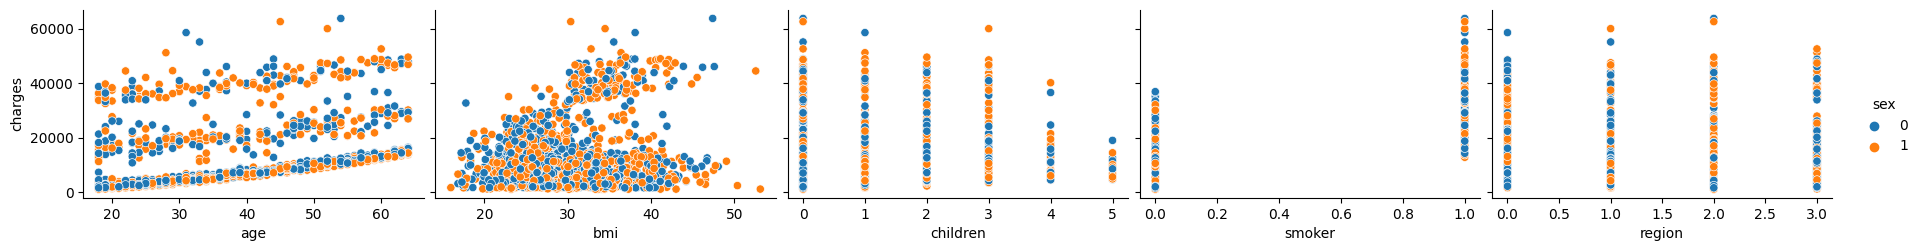

In [7]:
sns.pairplot(data, x_vars=['age','bmi','children','smoker','region'], y_vars='charges', hue='sex', aspect=1.5)
plt.show()

#### as you can see gender and region have no specific effect on charges, so we delete them...

In [8]:
columns = ['sex','region','charges']
X = data.drop(columns=columns, axis=1).values
y = data['charges'].values

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [10]:
# scaling the X array
X = scaler.fit_transform(X)

# split arrays to train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)
print('Coefficient is: ', model.coef_)
print('Intercept is: ', model.intercept_)

Coefficient is:  [3610.48961575 1996.54770967  514.79398108 9545.09158466]
Intercept is:  13316.407370620895


In [13]:
from sklearn.metrics import r2_score

In [14]:
predicted_y = model.predict(X_test)

print('Mean absolute error is %.2f' %np.mean(np.absolute(predicted_y - y_test)))
print('MSE is %.2f' %np.mean((predicted_y - y_test)**2))
print('R2 score is %.2f' %r2_score(y_test, predicted_y))

Mean absolute error is 4213.80
MSE is 33981653.95
R2 score is 0.78


### The R2 score for Linear Regression is 0.78 and is quite a good score.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_reg = PolynomialFeatures(degree=2)
X_poly= poly_reg.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [38]:
X_poly_test = poly_reg.fit_transform(X_test)
y_hat_poly = lin_reg_2.predict(X_poly_test)

print('Mean absolute error is %.2f' %np.mean(np.absolute(y_hat_poly - y_test)))
print('MSE is %.2f' %np.mean((y_hat_poly - y_test)**2))
print('R2 score is %.2f' %r2_score(y_test, y_hat_poly))

Mean absolute error is 2770.83
MSE is 20639165.51
R2 score is 0.87


### For Polynomial, the score is increased to 0.87 and we see a better result!

In [25]:
mydata = [[17, 22.4, 0, 0]]
mydata

[[17, 22.4, 0, 0]]

In [27]:
mydata = scaler.fit_transform(mydata)
model.predict(mydata)

array([13316.40737062])

#### In the end, I tested the model with my own input data and recieved the upper result!